Step 0 of 100
Removed 0 duplicate contacts
Agent #Agent #90 contacted agent #Agent #60 (household)
Agent #Agent #90 infected agent #Agent #60 (household)
Agent #Agent #90 contacted agent #Agent #67 (household)
Step 1 of 100
Removed 0 duplicate contacts
Agent #Agent #90 contacted agent #Agent #60 (household)
Agent #Agent #90 contacted agent #Agent #67 (household)
Agent #Agent #90 infected agent #Agent #67 (household)
Step 2 of 100
Removed 1 duplicate contacts
Agent #Agent #60 infected agent #Agent #53 (public_transport)
Agent #Agent #60 contacted agent #Agent #90 (household)
Agent #Agent #90 contacted agent #Agent #67 (household)
Step 3 of 100
Removed 3 duplicate contacts
Agent #Agent #60 infected agent #Agent #45 (public_transport)
Agent #Agent #60 infected agent #Agent #1 (social)
Agent #Agent #60 contacted agent #Agent #90 (household)
Agent #Agent #67 infected agent #Agent #0 (public_transport)
Agent #Agent #67 contacted agent #Agent #90 (household)
Step 4 of 100
Removed 3 duplicate 

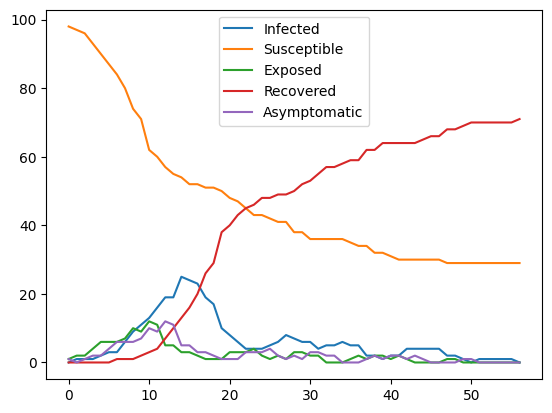

In [1]:
from network import Network
import networkx as nx

n_agents = 100
network = Network(n_agents)

# infect one random agent
network.agents[90].seir_state = 'A'

network.run_simulation(100)
network.plot_trends()

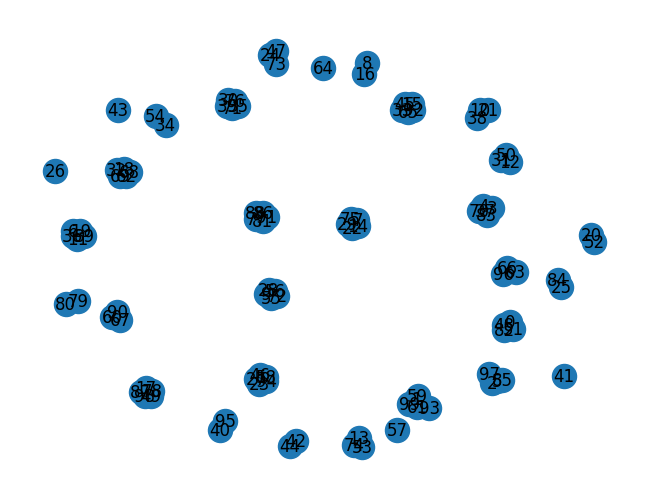

In [18]:
nx.draw(network.household_network, with_labels = True)

In [5]:
network.agents[90].household_connections

[Agent #549, Agent #840, Agent #440, Agent #426]

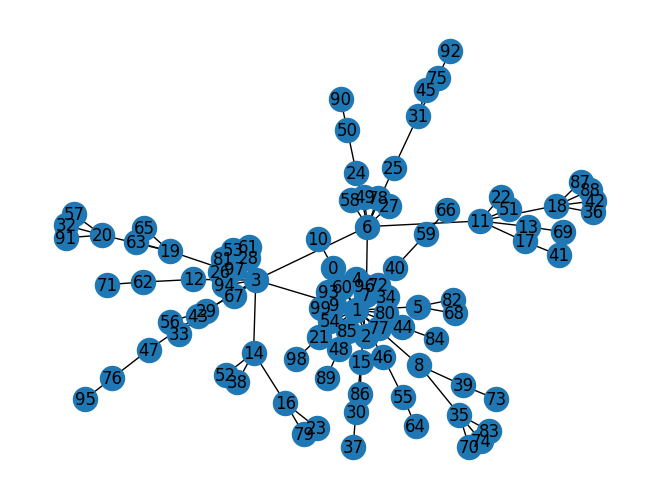

In [19]:
nx.draw(network.friendship_network, with_labels = True)

In [4]:
network.agents[90].friend_connections

[Agent #2]